In [2]:
!unzip /content/drive/MyDrive/Neural-Network-CNN.zip -d /content/drive/MyDrive/ttttt

Archive:  /content/drive/MyDrive/Neural-Network-CNN.zip
replace /content/drive/MyDrive/ttttt/Neural-Network-CNN/activation.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/drive/MyDrive/ttttt/Neural-Network-CNN/activation.py  
  inflating: /content/drive/MyDrive/ttttt/Neural-Network-CNN/activations.py  
  inflating: /content/drive/MyDrive/ttttt/Neural-Network-CNN/CNN_train_filter/CNN_train_filter.ipynb  
  inflating: /content/drive/MyDrive/ttttt/Neural-Network-CNN/convolutional.py  
  inflating: /content/drive/MyDrive/ttttt/Neural-Network-CNN/dense.py  
  inflating: /content/drive/MyDrive/ttttt/Neural-Network-CNN/layer.py  
  inflating: /content/drive/MyDrive/ttttt/Neural-Network-CNN/losses.py  
  inflating: /content/drive/MyDrive/ttttt/Neural-Network-CNN/mnist.py  
  inflating: /content/drive/MyDrive/ttttt/Neural-Network-CNN/mnist_conv.py  
  inflating: /content/drive/MyDrive/ttttt/Neural-Network-CNN/network.py  
  inflating: /content/drive/MyDrive/ttttt/Neural-Networ

In [3]:
cd /content/drive/MyDrive/ttttt/Neural-Network-CNN

/content/drive/MyDrive/ttttt/Neural-Network-CNN


Streaming output truncated to the last 5000 lines.
5001/10000, error=4.3406384834679034e-05
5002/10000, error=4.3396926183137545e-05
5003/10000, error=4.3387471645480636e-05
5004/10000, error=4.337802121902038e-05
5005/10000, error=4.336857490107018e-05
5006/10000, error=4.3359132688946645e-05
5007/10000, error=4.334969457996596e-05
5008/10000, error=4.3340260571450866e-05
5009/10000, error=4.333083066072287e-05
5010/10000, error=4.332140484510822e-05
5011/10000, error=4.33119831219338e-05
5012/10000, error=4.330256548852956e-05
5013/10000, error=4.329315194222875e-05
5014/10000, error=4.3283742480364346e-05
5015/10000, error=4.327433710027425e-05
5016/10000, error=4.326493579929734e-05
5017/10000, error=4.325553857477451e-05
5018/10000, error=4.324614542405153e-05
5019/10000, error=4.323675634447233e-05
5020/10000, error=4.322737133338656e-05
5021/10000, error=4.321799038814488e-05
5022/10000, error=4.320861350609993e-05
5023/10000, error=4.319924068460766e-05
5024/10000, error=4.3189

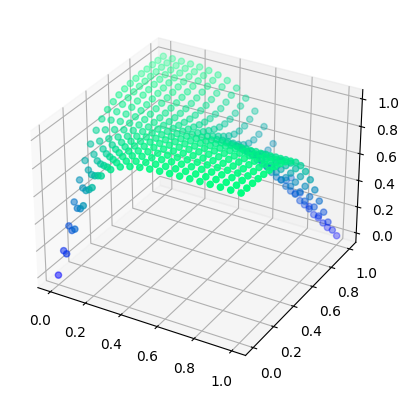

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from dense import Dense
from activations import Tanh
from losses import mse, mse_prime
from network import train, predict

X = np.reshape([[0, 0], [0, 1], [1, 0], [1, 1]], (4, 2, 1))
Y = np.reshape([[0], [1], [1], [0]], (4, 1, 1))

network = [
    Dense(2, 3),
    Tanh(),
    Dense(3, 1),
    Tanh()
]

# train
train(network, mse, mse_prime, X, Y, epochs=10000, learning_rate=0.1)

# decision boundary plot
points = []
for x in np.linspace(0, 1, 20):
    for y in np.linspace(0, 1, 20):
        z = predict(network, [[x], [y]])
        points.append([x, y, z[0,0]])

points = np.array(points)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=points[:, 2], cmap="winter")
plt.show()

In [5]:
import numpy as np
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from dense import Dense
from activations import Tanh
from losses import mse, mse_prime
from network import train, predict


def preprocess_data(x, y, limit):
    # reshape and normalize input data
    x = x.reshape(x.shape[0], 28 * 28, 1)
    x = x.astype("float32") / 255
    # encode output which is a number in range [0,9] into a vector of size 10
    # e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
    y = to_categorical(y)
    y = y.reshape(y.shape[0], 10, 1)
    return x[:limit], y[:limit]


# load MNIST from server
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = preprocess_data(x_train, y_train, 1000)
x_test, y_test = preprocess_data(x_test, y_test, 20)

# neural network
network = [
    Dense(28 * 28, 40),
    Tanh(),
    Dense(40, 10),
    Tanh()
]

# train
train(network, mse, mse_prime, x_train, y_train, epochs=100, learning_rate=0.1)

# test
for x, y in zip(x_test, y_test):
    output = predict(network, x)
    print('pred:', np.argmax(output), '\ttrue:', np.argmax(y))

11490434/11490434 [==============================] - 0s 0us/step
1/100, error=0.8780759815179788
2/100, error=0.8098931434587091
3/100, error=0.7666916335188653
4/100, error=0.7210492390265677
5/100, error=0.6563848382634353
6/100, error=0.5761130615319483
7/100, error=0.46885545935673384
8/100, error=0.3459945199193127
9/100, error=0.2520798945271445
10/100, error=0.18119061130601943
11/100, error=0.13844251324161358
12/100, error=0.12266486806565911
13/100, error=0.11526048346378227
14/100, error=0.1097835688000766
15/100, error=0.1058432048732259
16/100, error=0.10346246272346266
17/100, error=0.10133027196980081
18/100, error=0.09868378116108757
19/100, error=0.09689689717706332
20/100, error=0.09579698061315453
21/100, error=0.09450345466359264
22/100, error=0.09328453016649092
23/100, error=0.09186641035959926
24/100, error=0.09071675628356415
25/100, error=0.08955238182964467
26/100, error=0.08871102673277055
27/100, error=0.08784410999555246
28/100, error=0.08705846821119774
29

In [6]:
import numpy as np
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from dense import Dense
from convolutional import Convolutional
from reshape import Reshape
from activations import Sigmoid
from losses import binary_cross_entropy, binary_cross_entropy_prime
from network import train, predict

def preprocess_data(x, y, limit):
    zero_index = np.where(y == 0)[0][:limit]
    one_index = np.where(y == 1)[0][:limit]
    all_indices = np.hstack((zero_index, one_index))
    all_indices = np.random.permutation(all_indices)
    x, y = x[all_indices], y[all_indices]
    x = x.reshape(len(x), 1, 28, 28)
    x = x.astype("float32") / 255
    y = to_categorical(y)
    y = y.reshape(len(y), 2, 1)
    return x, y

# load MNIST from server, limit to 100 images per class since we're not training on GPU
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = preprocess_data(x_train, y_train, 100)
x_test, y_test = preprocess_data(x_test, y_test, 100)

# neural network
network = [
    Convolutional((1, 28, 28), 3, 5),
    Sigmoid(),
    Reshape((5, 26, 26), (5 * 26 * 26, 1)),
    Dense(5 * 26 * 26, 100),
    Sigmoid(),
    Dense(100, 2),
    Sigmoid()
]

# train
train(
    network,
    binary_cross_entropy,
    binary_cross_entropy_prime,
    x_train,
    y_train,
    epochs=20,
    learning_rate=0.1
)

# test
for x, y in zip(x_test, y_test):
    output = predict(network, x)
    print(f"pred: {np.argmax(output)}, true: {np.argmax(y)}")


1/20, error=0.2974758825299321
2/20, error=0.06855063533825768
3/20, error=0.035028395106749745
4/20, error=0.015552438859052711
5/20, error=0.010630625304326614
6/20, error=0.008358620687894962
7/20, error=0.006778979578547223
8/20, error=0.005727385950530062
9/20, error=0.005006994036867451
10/20, error=0.004469022596465572
11/20, error=0.004040762082826748
12/20, error=0.0036855792143762776
13/20, error=0.0033817257403999735
14/20, error=0.0031153836374603894
15/20, error=0.0028761151761882505
16/20, error=0.002659555420486665
17/20, error=0.002473122849456388
18/20, error=0.002317038558976927
19/20, error=0.0021836414047474847
20/20, error=0.002066515767746008
pred: 0, true: 0
pred: 0, true: 0
pred: 0, true: 0
pred: 0, true: 0
pred: 1, true: 1
pred: 0, true: 0
pred: 1, true: 1
pred: 0, true: 0
pred: 0, true: 0
pred: 1, true: 1
pred: 0, true: 0
pred: 1, true: 1
pred: 1, true: 1
pred: 0, true: 0
pred: 1, true: 1
pred: 0, true: 0
pred: 0, true: 0
pred: 0, true: 0
pred: 1, true: 1
pred